### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [109]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

#### 1. Import the necessary packages - 2.5 marks

In [110]:
Data = pd.read_csv('Data.csv')
print('Data : ')
print(Data.head(3))

Data : 
   user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116


In [111]:
item = pd.read_csv('item.csv')
print('item : ')
print(item.head(3))

item : 
   movie id  movie title release date  unknown  Action  Adventure  Animation  \
0         1   Toy Story   01-Jan-1995        0       0          0          1   
1         2   GoldenEye   01-Jan-1995        0       1          1          0   
2         3  Four Rooms   01-Jan-1995        0       0          0          0   

   Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
0          1       1      0  ...        0          0       0        0   
1          0       0      0  ...        0          0       0        0   
2          0       0      0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         1    0        0  
2        0        0       0         1    0        0  

[3 rows x 22 columns]


In [112]:
user = pd.read_csv('user.csv')
print('user : ')
print(user.head(3))

user : 
   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [113]:
print('Data information:')
Data.info()
print('')
print('Data shape \n',Data.shape)
print('')
print('Data description:')
Data.describe()

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Data shape 
 (100000, 4)

Data description:


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [114]:
#print(Data['user id'].count())
#print(Data['movie id'].count())
#print(Data['rating'].count())
#print(Data['timestamp'].count())
#print(Data.columns) print the list of the colums
#print(Data.shape[0]) print the number of rows from the shape

In [115]:
Total_missing_Data = 0.0
#start with 0.0 as a default#
for col in Data.columns:##Iterate over all coloums in the Data file##
    Missing_Data = Data.shape[0]-Data[col].count()#subtract the counts (avialable data in each col) from the total number of rows
    Total_missing_Data =Total_missing_Data + Missing_Data#Add all the results and reset
    #print('number of missing values in Data: ',col, 'is: ', Missing_Data)
    #print('Total_missing_Data',Total_missing_Data)
print('Final Total_missing_Data',Total_missing_Data)

Final Total_missing_Data 0.0


In [116]:
###OR###
for col in Data.columns:
    print('For the',col,'in Data: Are there any missing values of standard type NAN')
    print(pd.DataFrame({'value' : Data[col], 'Missing?' : Data[col].isnull()}))
    print('')

For the user id in Data: Are there any missing values of standard type NAN
       value  Missing?
0        196     False
1        186     False
2         22     False
3        244     False
4        166     False
...      ...       ...
99995    880     False
99996    716     False
99997    276     False
99998     13     False
99999     12     False

[100000 rows x 2 columns]

For the movie id in Data: Are there any missing values of standard type NAN
       value  Missing?
0        242     False
1        302     False
2        377     False
3         51     False
4        346     False
...      ...       ...
99995    476     False
99996    204     False
99997   1090     False
99998    225     False
99999    203     False

[100000 rows x 2 columns]

For the rating in Data: Are there any missing values of standard type NAN
       value  Missing?
0          3     False
1          3     False
2          1     False
3          2     False
4          1     False
...      ...       ...
99995 

In [117]:
print('item information:')
item.info()
print('')
print('item shape \n',item.shape)
print('')
print('item description:')
item.describe()

item information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
for col in item.columns:
    #print(col)
    Total_missing_item = 0.0
    Missing_item = item.shape[0]-item[col].count()
    Total_missing_item = Total_missing_item + Missing_item
    #print('number of missing values in item: ',col, 'is: ', Missing_item)
print('Total_missing_item',Total_missing_item)    

Total_missing_item 0.0


In [119]:
for col in item.columns:
    print('For the',col,'in item: Are there any missing values of standard type NAN')
    print(pd.DataFrame({'value' : item[col], 'Missing?' : item[col].isnull()}))
    print('')

For the movie id in item: Are there any missing values of standard type NAN
      value  Missing?
0         1     False
1         2     False
2         3     False
3         4     False
4         5     False
...     ...       ...
1676   1678     False
1677   1679     False
1678   1680     False
1679   1681     False
1680   1682     False

[1681 rows x 2 columns]

For the movie title in item: Are there any missing values of standard type NAN
                                    value  Missing?
0                              Toy Story      False
1                              GoldenEye      False
2                             Four Rooms      False
3                             Get Shorty      False
4                                Copycat      False
...                                   ...       ...
1676                          Mat' i syn      False
1677                           B. Monkey      False
1678                       Sliding Doors      False
1679                        You So 

In [120]:
print('user information:')
user.info()
print('')
print('user shape \n',user.shape)
print('')
print('user description:')
user.describe()

user information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

user shape 
 (943, 5)

user description:


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [121]:
for col in user.columns:
    Total_missing_user = 0.0
    #print(col)
    Missing_user = user.shape[0]-user[col].count()
    Total_missing_user = Total_missing_user + Missing_user
    #print('number of missing values in Data: ',col, 'is: ', Missing_Data)
print('Total_missing_user',Total_missing_user)

Total_missing_user 0.0


In [122]:
for col in user.columns:
    print('For the',col,'in user: Are there any missing values of standard type NAN')
    print(pd.DataFrame({'value' : user[col], 'Missing?' : user[col].isnull()}))
    print('')

For the user id in user: Are there any missing values of standard type NAN
     value  Missing?
0        1     False
1        2     False
2        3     False
3        4     False
4        5     False
..     ...       ...
938    939     False
939    940     False
940    941     False
941    942     False
942    943     False

[943 rows x 2 columns]

For the age in user: Are there any missing values of standard type NAN
     value  Missing?
0       24     False
1       53     False
2       23     False
3       24     False
4       33     False
..     ...       ...
938     26     False
939     32     False
940     20     False
941     48     False
942     22     False

[943 rows x 2 columns]

For the gender in user: Are there any missing values of standard type NAN
    value  Missing?
0       M     False
1       F     False
2       M     False
3       M     False
4       F     False
..    ...       ...
938     F     False
939     M     False
940     M     False
941     F     False
942   

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [123]:
#for col in item.columns:
    #print(col)
#print(item.columns)
#print(item.columns[0])
#print(len(item.columns))

In [124]:
for i in np.arange(4,len(item.columns)):
    print(item.columns[i],'has  been registered')
    print(item[item.columns[i]].sum(),'times')
    print('')

Action has  been registered
251 times

Adventure has  been registered
135 times

Animation has  been registered
42 times

Childrens has  been registered
122 times

Comedy has  been registered
505 times

Crime has  been registered
109 times

Documentary has  been registered
50 times

Drama has  been registered
725 times

Fantasy has  been registered
22 times

Film-Noir has  been registered
24 times

Horror has  been registered
92 times

Musical has  been registered
56 times

Mystery has  been registered
61 times

Romance has  been registered
247 times

Sci-Fi has  been registered
101 times

Thriller has  been registered
251 times

War has  been registered
71 times

Western has  been registered
27 times



In [125]:
# use sum on the default axis

#### 4. Find the number of movies per genre using the item data - 5 marks

#### 5. Find the movies that have more than one genre - 2.5 marks

In [126]:
#print(item.iterrows())
#print(item.iloc[0])
#print('')
#print(item.iloc[[0],[4]])
#for i in np.arange(0,2):
    #print(item.iloc[i])
    #print('')
#print(item.sum(axis=1))
#print(item.sum(axis=1)[0])  
#for i in np.arange(0,2):
    #print(item.iloc[[i],[0]])
    #print(item.iloc[[i],[1]])
    #print(item.sum(axis=1)[i]) 
    #number=item.sum(axis=1)[i]-item.iloc[[i],[0]]
    #print(number)
    #print(item.columns)

In [127]:
#hint: use sum on the axis = 1
##get a list of the genre##
genre_list = item.columns [4:len(item.columns)]
print(genre_list)
##sum all entries in each row in the range of the genre list created above##
print(item[genre_list].sum(axis=1))

Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')
0       3
1       3
2       1
3       3
4       3
       ..
1676    1
1677    2
1678    2
1679    1
1680    1
Length: 1681, dtype: int64


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [128]:
##how many movies with an unknow genre
print('**number of movies with unknown genre is',item['unknown'].sum())
print('')
################################################################################
print('**which movie has 1.0 in the unknown genre entry')
print(item['unknown']>0.0)
print('')
#################################################################################
print('**which movie in the whole dataframe has 1.0 entry in the unknown col ')
print(item[item['unknown']>0.0])
print('')
##################################################################################
print('**Here is the detailed information of the movie that has 1.0 entry in the unknown col')
print(item.iloc[1370])
###################################################################################
##drop the row with the index 1370 and rename the new dataframe##
item_1 = item.drop(1370,axis=0)
print('')
###################################################################
##Double check the number of rows has decreased by one
print('**item shape_original',item.shape)
print('')
print('**item_1 shape after dropping the row 1370',item_1.shape)

**number of movies with unknown genre is 1

**which movie has 1.0 in the unknown genre entry
0       False
1       False
2       False
3       False
4       False
        ...  
1676    False
1677    False
1678    False
1679    False
1680    False
Name: unknown, Length: 1681, dtype: bool

**which movie in the whole dataframe has 1.0 entry in the unknown col 
      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]

**Here is the detailed information of the movie that has 1.0 entry in the unknown col
movie id                  1372
movie title     Stranger, The 
release date       01-Jan-1994

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [129]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [130]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [131]:
#your answers here##
##lets recall witch variable refer to which dataframe##
print('Data  :',Data.columns,'\n')
print('item_1  :',item_1.columns,'\n')
print('user  :',user.columns)

Data  : Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object') 

item_1  : Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object') 

user  : Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')


In [132]:
##Merge all data frames##
### 1### Merge Data and item##
Data_item_1=pd.merge(Data,item_1,how='outer')
Data_item_1.head()
Data_item_1.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [133]:
###2###Merge Data_item and users##
Data_item_1_user=pd.merge(Data_item_1,user,how='outer')
Data_item_1_user.head()
Data_item_1_user.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'age', 'gender', 'occupation',
       'zip code'],
      dtype='object')

In [134]:
##Rename the merged dataframes in a simpler way###
All_Data=Data_item_1_user
All_Data.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105
1,196,257,2,881251577,Men in Black,04-Jul-1997,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-1996,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The",08-Mar-1996,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105


In [135]:
All_Data.shape

(100000, 29)

In [136]:
#sns.distplot(All_Data['rating'], kde=False, rug=True);
#plt.xlabel('Rating of the movie')
#plt.ylabel('Counts')

Text(0.5, 1.0, 'Count plot of the Rating of movies')

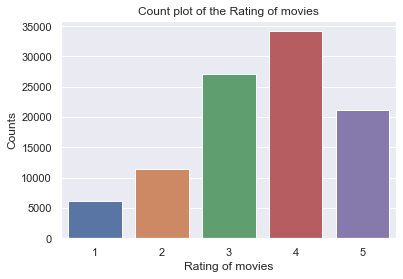

In [137]:
sns.countplot(All_Data['rating']);
plt.xlabel('Rating of movies')
plt.ylabel('Counts')
plt.title('Count plot of the Rating of movies')

Text(0.5, 1.0, 'Distripution plot of the Age of the users')

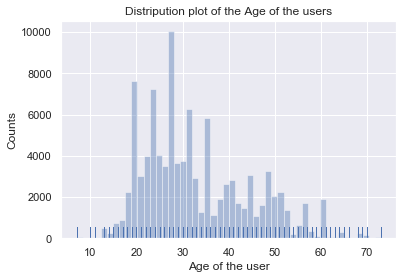

In [138]:
sns.distplot(All_Data['age'], kde=False, rug=True);
plt.xlabel('Age of the user')
plt.ylabel('Counts')
plt.title('Distripution plot of the Age of the users')

In [139]:
All_Data['year']=pd.DatetimeIndex(All_Data['release date']).year
print(All_Data['year'])
All_Data.shape
##All_Data.head()
All_Data.columns

0        1997.0
1        1997.0
2        1996.0
3        1996.0
4        1994.0
          ...  
99995    1997.0
99996    1997.0
99997    1998.0
99998    1997.0
99999    1997.0
Name: year, Length: 100000, dtype: float64


Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'age', 'gender', 'occupation', 'zip code',
       'year'],
      dtype='object')

Text(0.5, 1.0, 'Distripution plot of the Year of release')

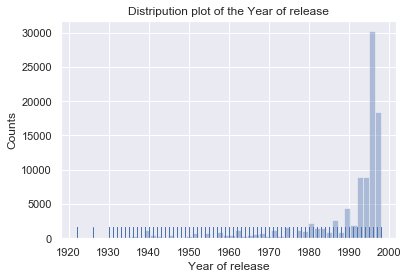

In [140]:
sns.distplot(All_Data['year'], kde=False, rug=True);
plt.xlabel('Year of release')
plt.ylabel('Counts')
plt.title('Distripution plot of the Year of release')

Text(0.5, 1.0, 'Count plot of the Gender of users')

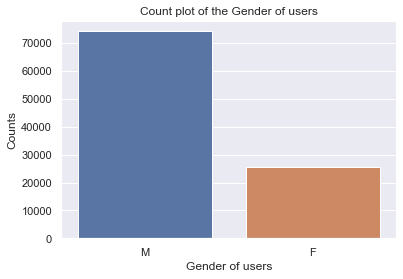

In [141]:
sns.countplot(All_Data['gender']);
plt.xlabel('Gender of users')
plt.ylabel('Counts')
plt.title('Count plot of the Gender of users')

Text(0.5, 1.0, 'Count plot of the occupation of users')

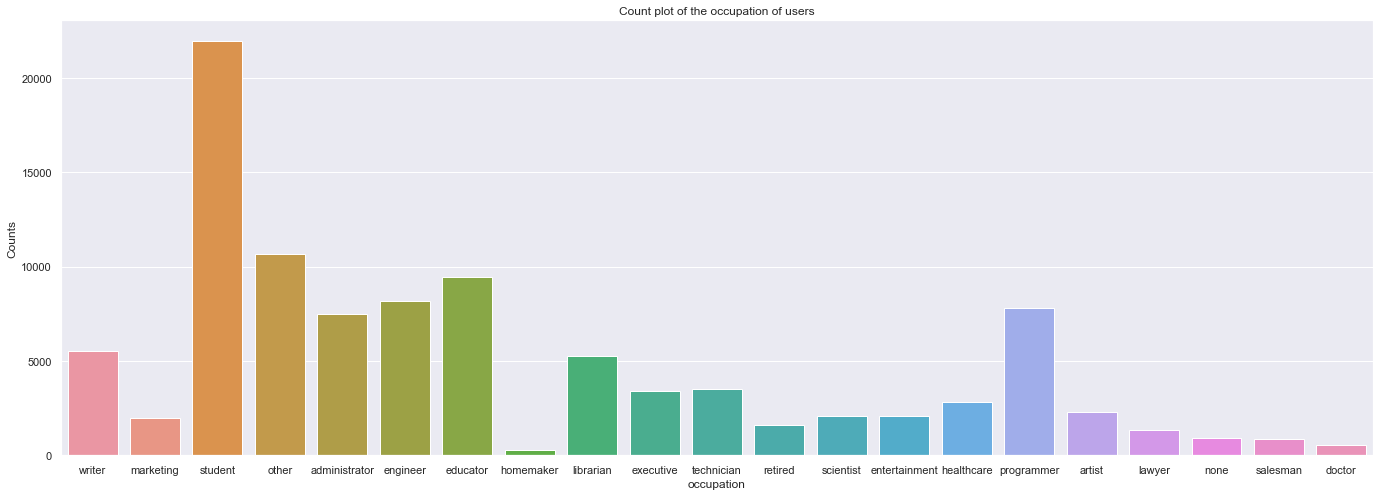

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(23.5,8)
sns.countplot(All_Data['occupation'],ax=ax);
plt.xlabel('occupation')
plt.ylabel('Counts')
plt.title('Count plot of the occupation of users')

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [179]:
#Your answer here
All_Data.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code,year
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105,1997.0
1,196,257,2,881251577,Men in Black,04-Jul-1997,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,49,M,writer,55105,1997.0
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-1996,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,49,M,writer,55105,1996.0
3,196,25,4,881251955,"Birdcage, The",08-Mar-1996,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105,1996.0
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49,M,writer,55105,1994.0


In [189]:
All_Data.tail()
All_Data['year'].max()

1998.0

In [180]:
#All_Data.groupby(['year','Sci-Fi']).co
#All_Data.groupby(['year']).sum()
#grouped_year['Action'].sum()
#grouped_year['Animation'].sum()
#print(All_Data.groupby(['Action']))
#sns.barplot(All_Data['year'], All_Data['Action'], ax=ax)#, hue=auto['fuel_type']);
#sns.distplot(grouped_year['Action'], kde=False, rug=True);
#grouped_year.set_index('year',inplace=True)

In [181]:
#grouped_year = All_Data.groupby(['year']).sum()
#print(grouped_year)
#fig, ax = plt.subplots()
#fig.set_size_inches(23.5,10)
#sns.barplot(grouped_year.index, grouped_year['Action'],ax=ax)
#print(grouped_year.index)
#plt.xlabel('year')
#plt.ylabel('Action')
#plt.title('Count plot of the Action through years')

In [182]:
#grouped_year.columns[5:22]
#print(grouped_year.columns[5:22])
#grouped_year.columns[5:22][0]
#for col in grouped_year.columns[5:6]:
    #print(col)
    #col ="'"+col+"'"
    #print(col)
    #sns.barplot(grouped_year.index, grouped_year[col],ax=ax)
    #plt.xlabel('year')
    #plt.ylabel(i)
    #plt.title('Count plot of the',i)

In [183]:
#print(grouped_year.index)

#sns.barplot(grouped_year.index, grouped_year['Adventure'],ax=ax)
#plt.xlabel('year')
#plt.ylabel('Action')
#plt.title('Count plot of the Action through years')

In [184]:
#sns.pairplot(grouped_year);

In [ ]:
#grouped=All_Data.groupby(['year','Action']).sum().reset_index()
#print(grouped)
#sns.barplot(grouped['year'],grouped['Action']);
#All_Data.groupby(['year','Action'],as_index = False).sum().pivot('year','Action').fillna(0)
#groupedyear.set_index('year',inplace=True)
#print(groupedyear)
######################################################################

In [220]:
##worked for single plot###
#groupedyear=All_Data.groupby(['year'])['Action'].sum().reset_index()
#print(groupedyear)
#fig, ax = plt.subplots()
#fig.set_size_inches(23.5,15)
#sns.barplot(groupedyear['year'],groupedyear['Action'],ax=ax)
#plt.xlabel('year')
#plt.ylabel('Action releases')
#plt.title('Count plot of the Action releases through years')

Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War'],
      dtype='object')


C:\Users\hassa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\Users\hassa\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\hassa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam 

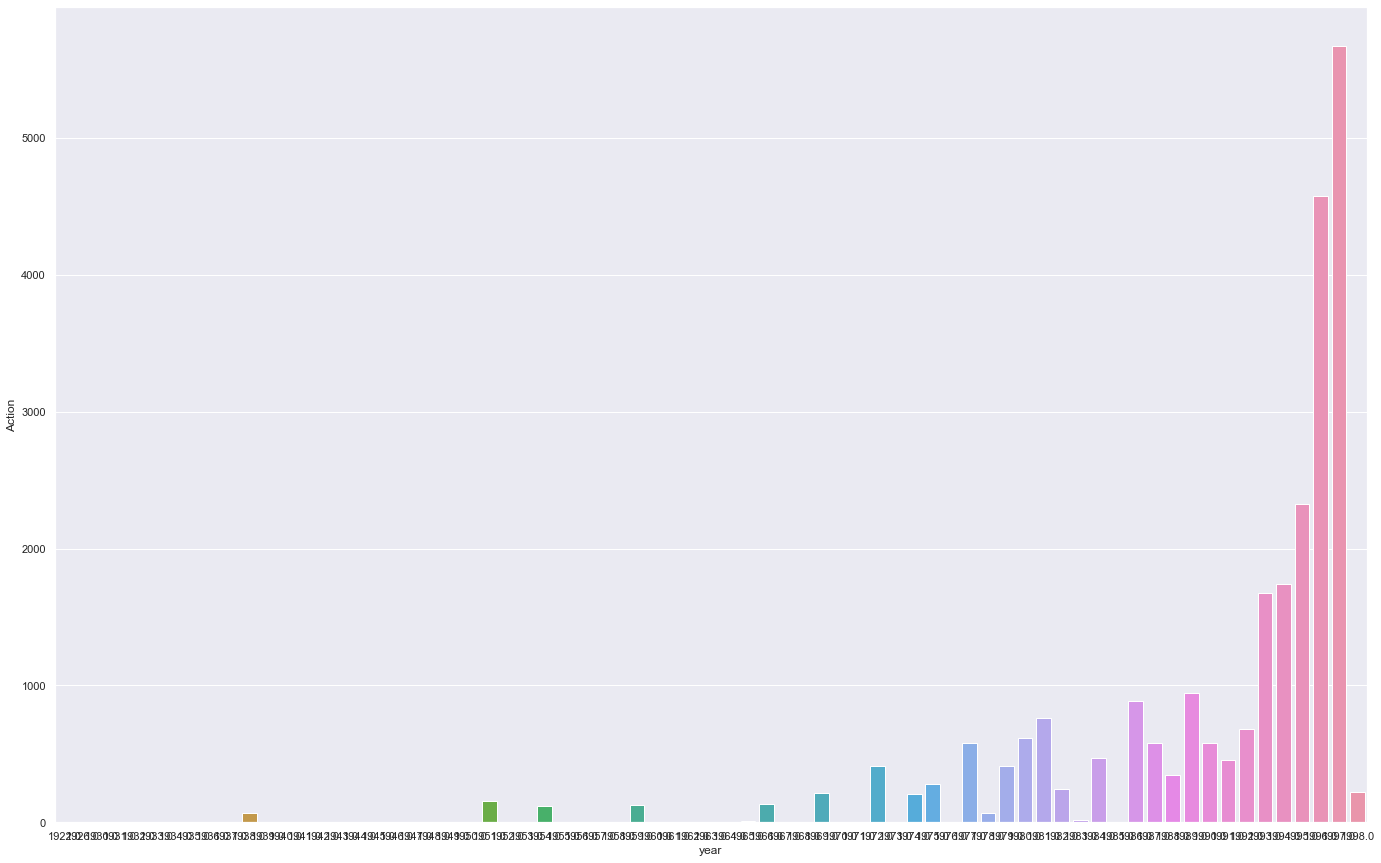

<Figure size 432x288 with 0 Axes>

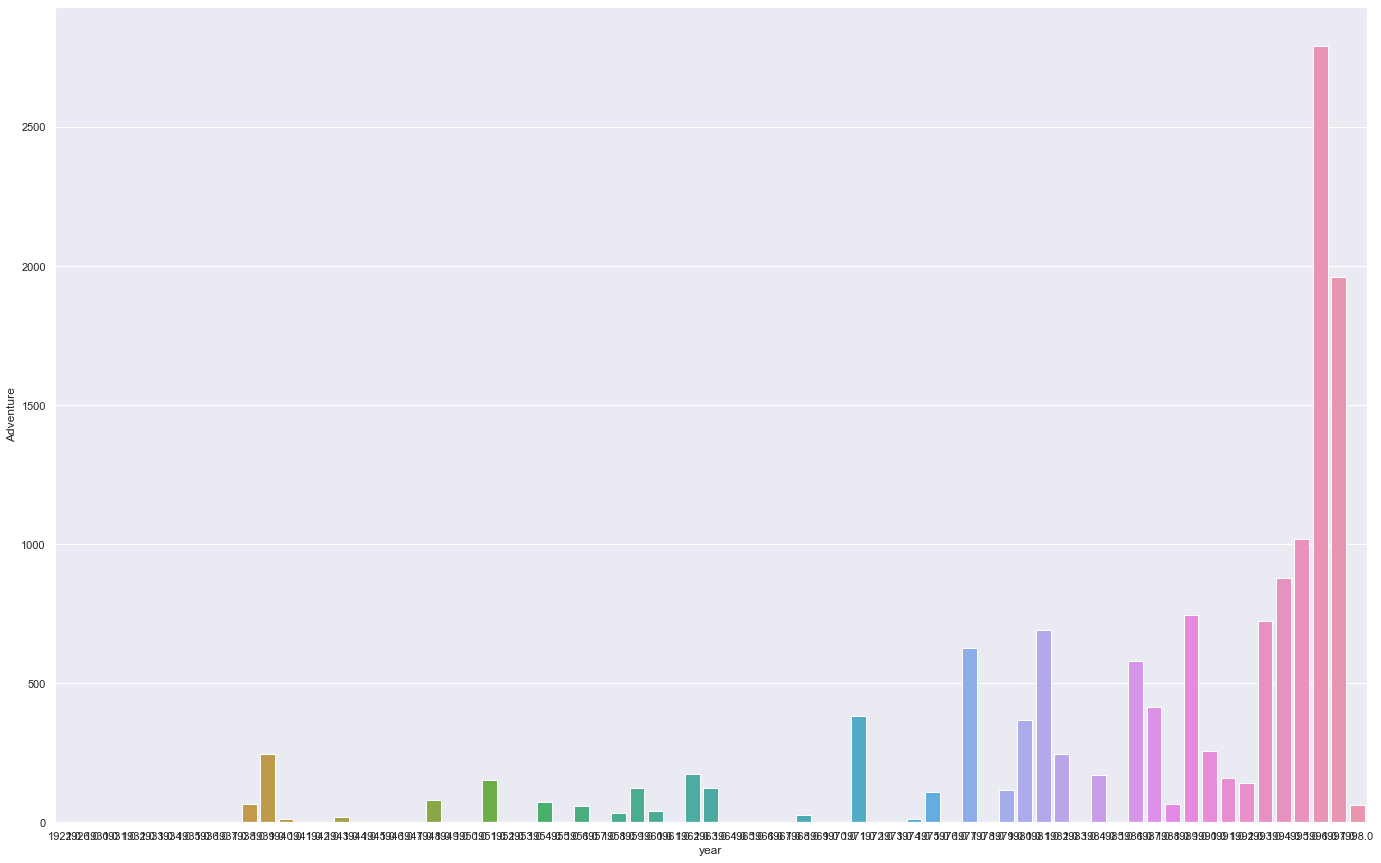

<Figure size 432x288 with 0 Axes>

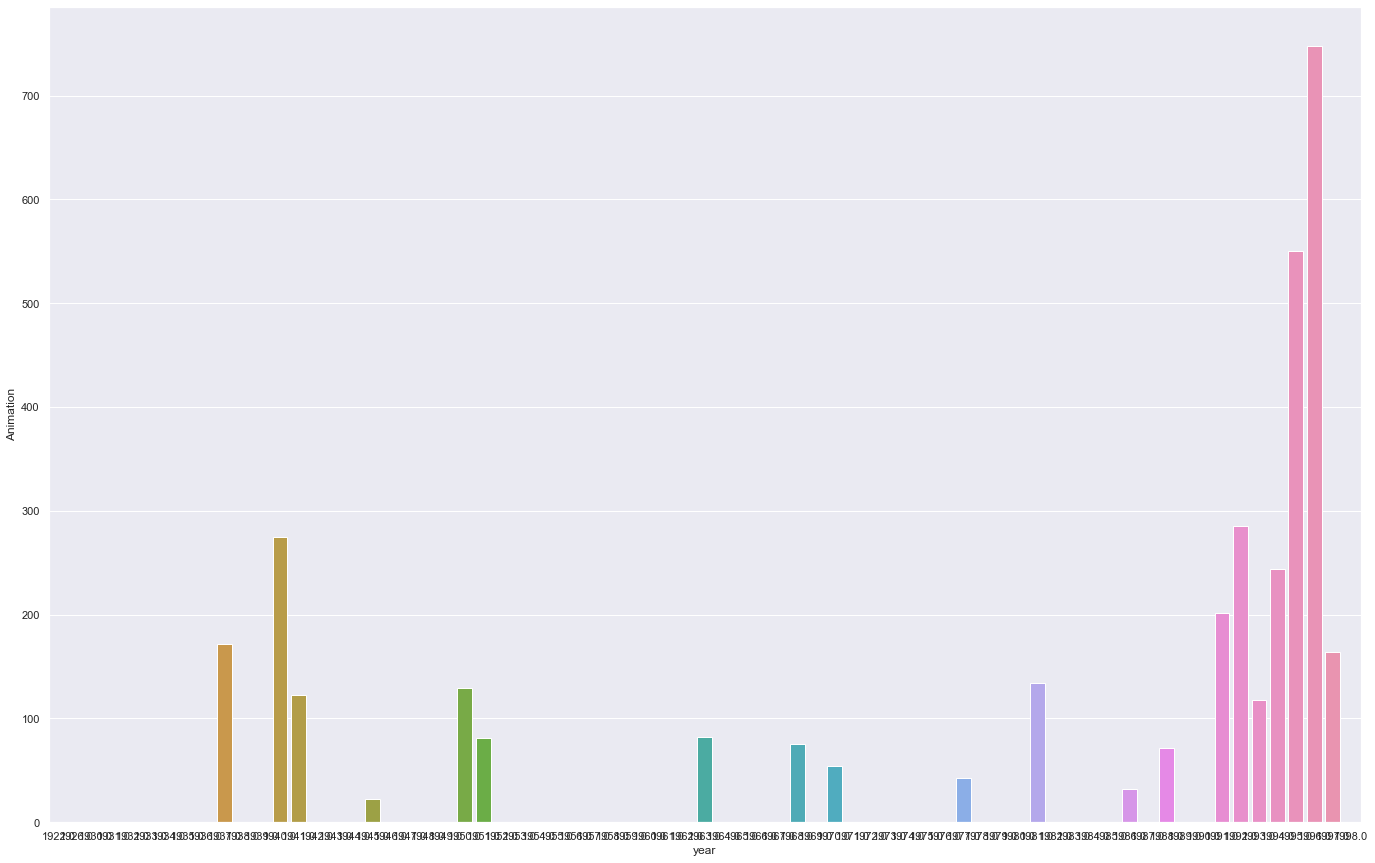

<Figure size 432x288 with 0 Axes>

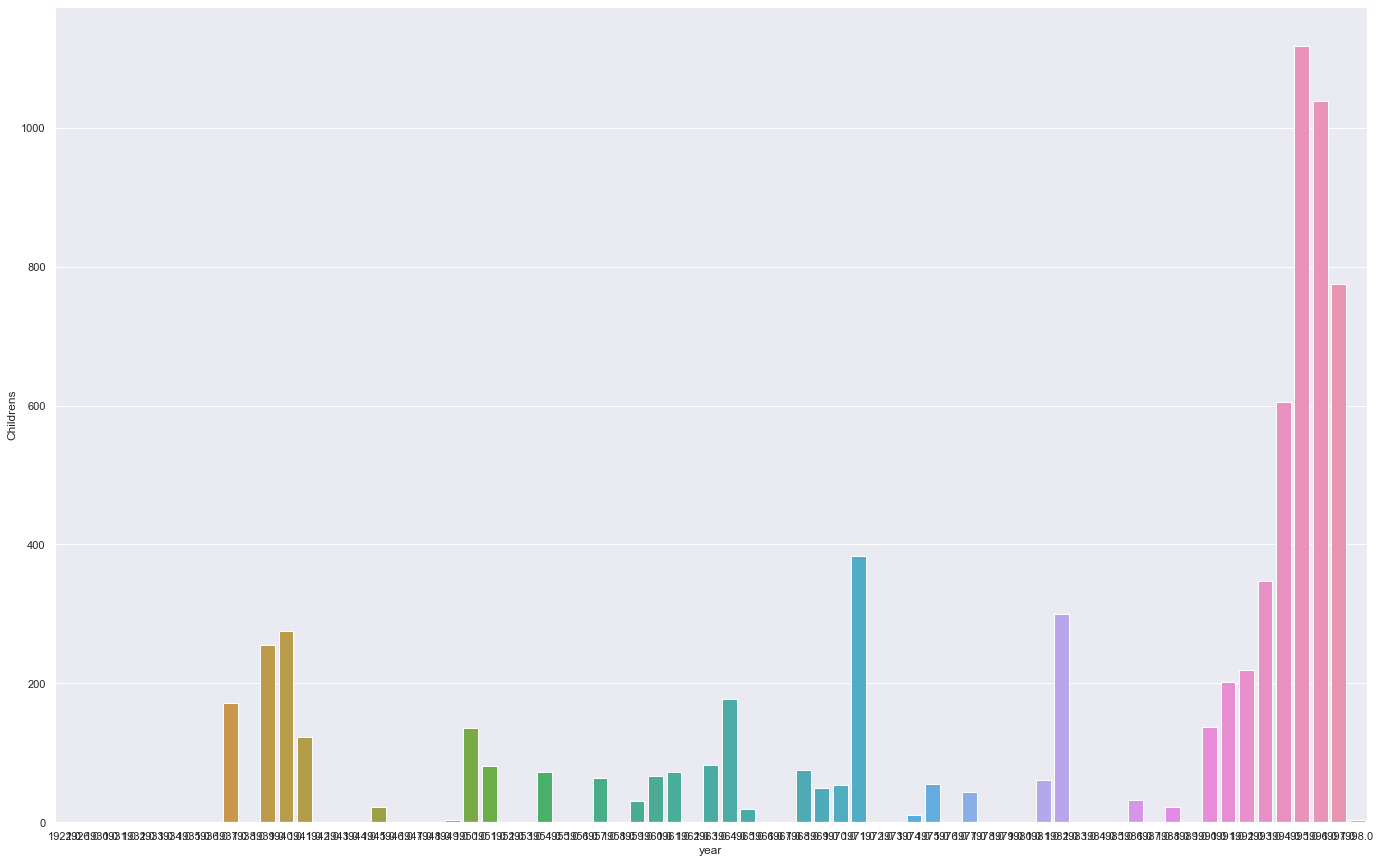

<Figure size 432x288 with 0 Axes>

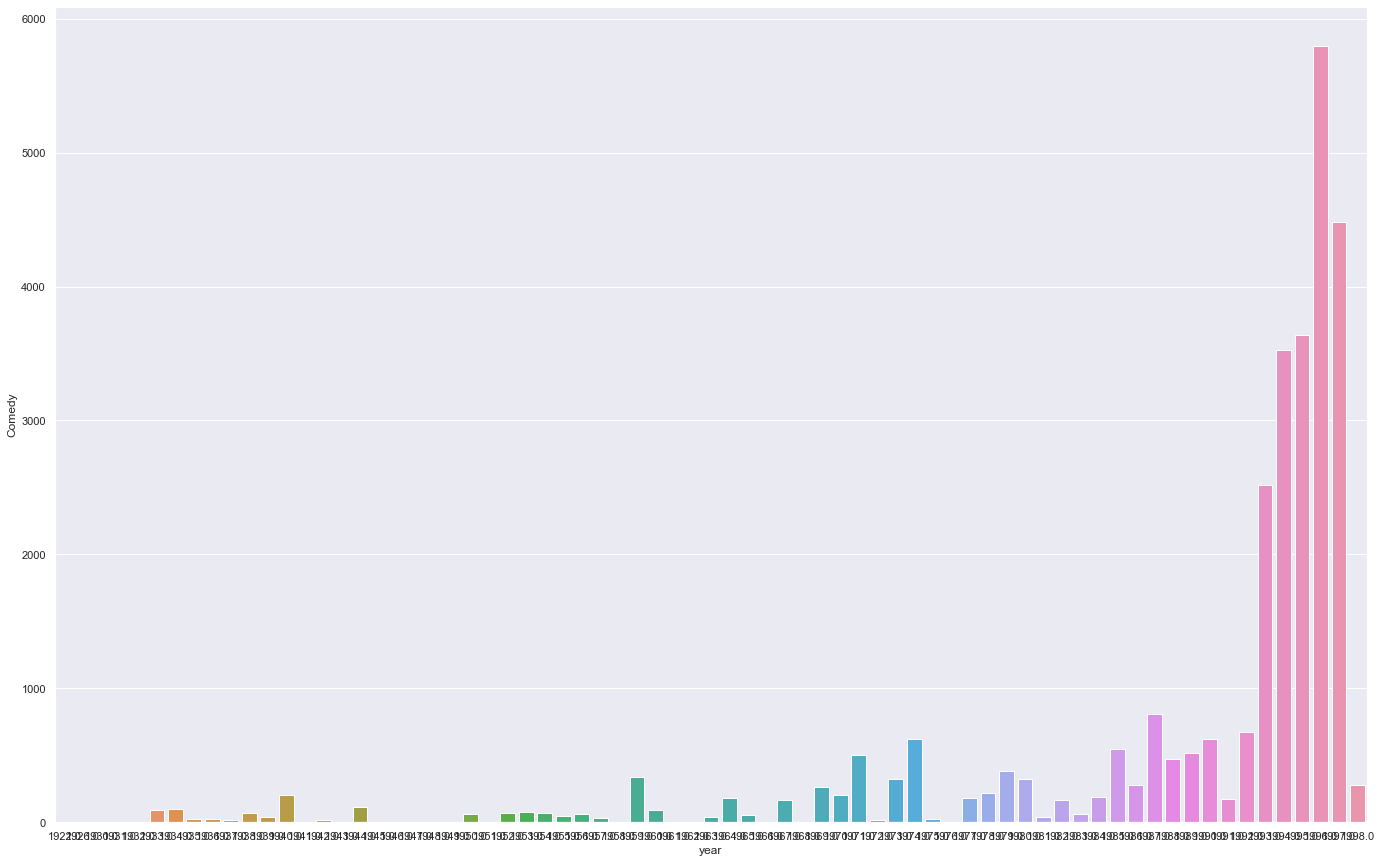

<Figure size 432x288 with 0 Axes>

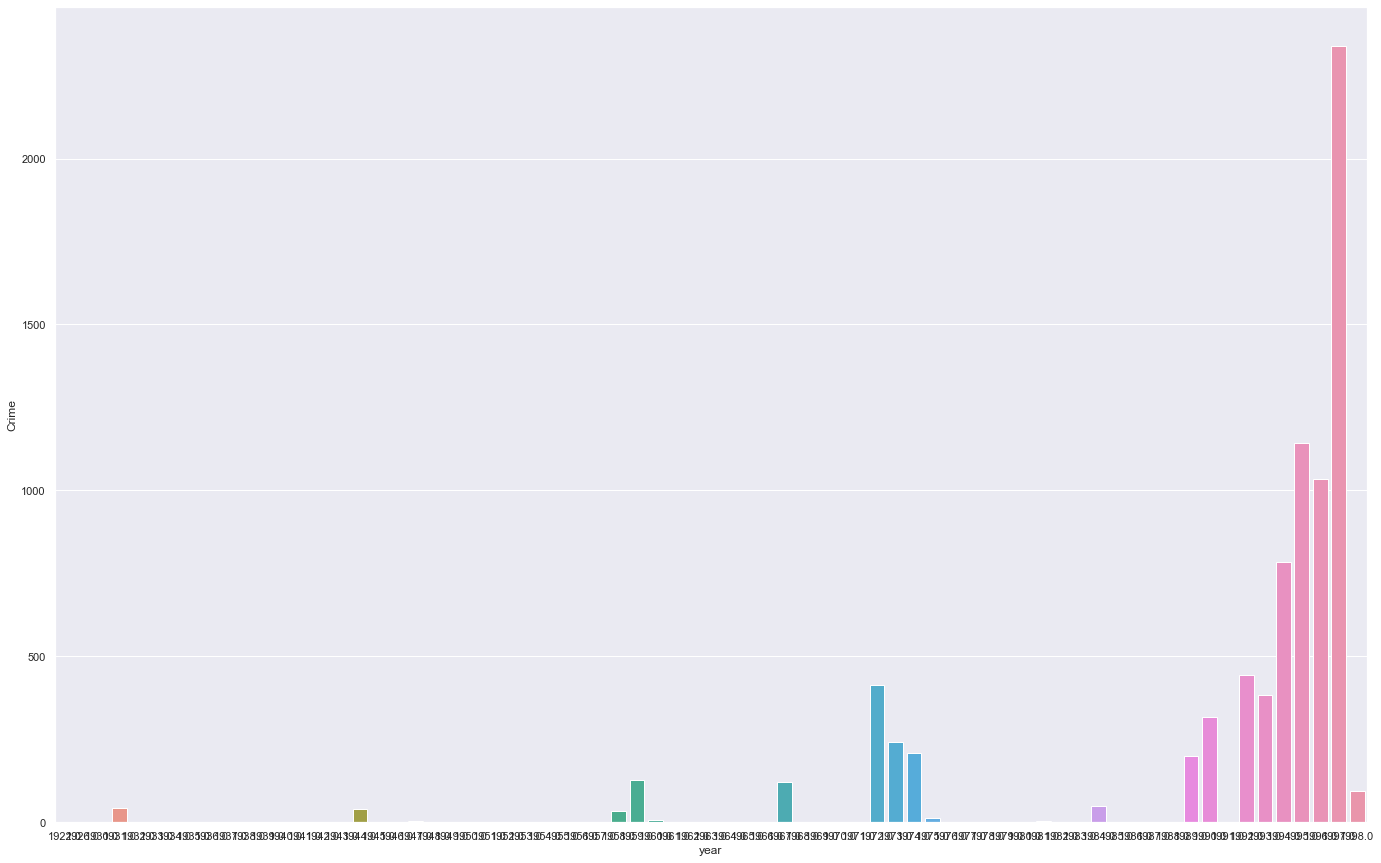

<Figure size 432x288 with 0 Axes>

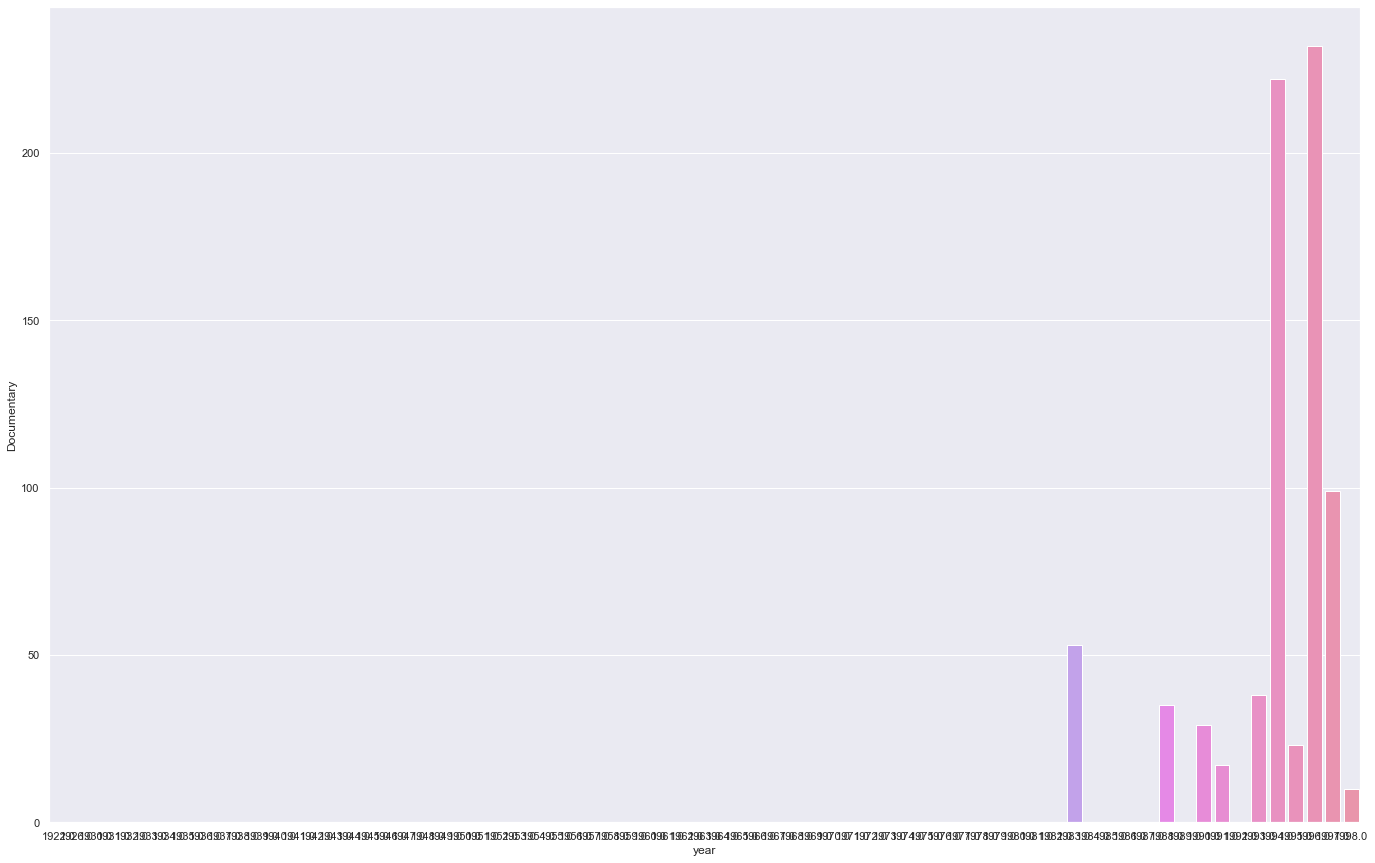

<Figure size 432x288 with 0 Axes>

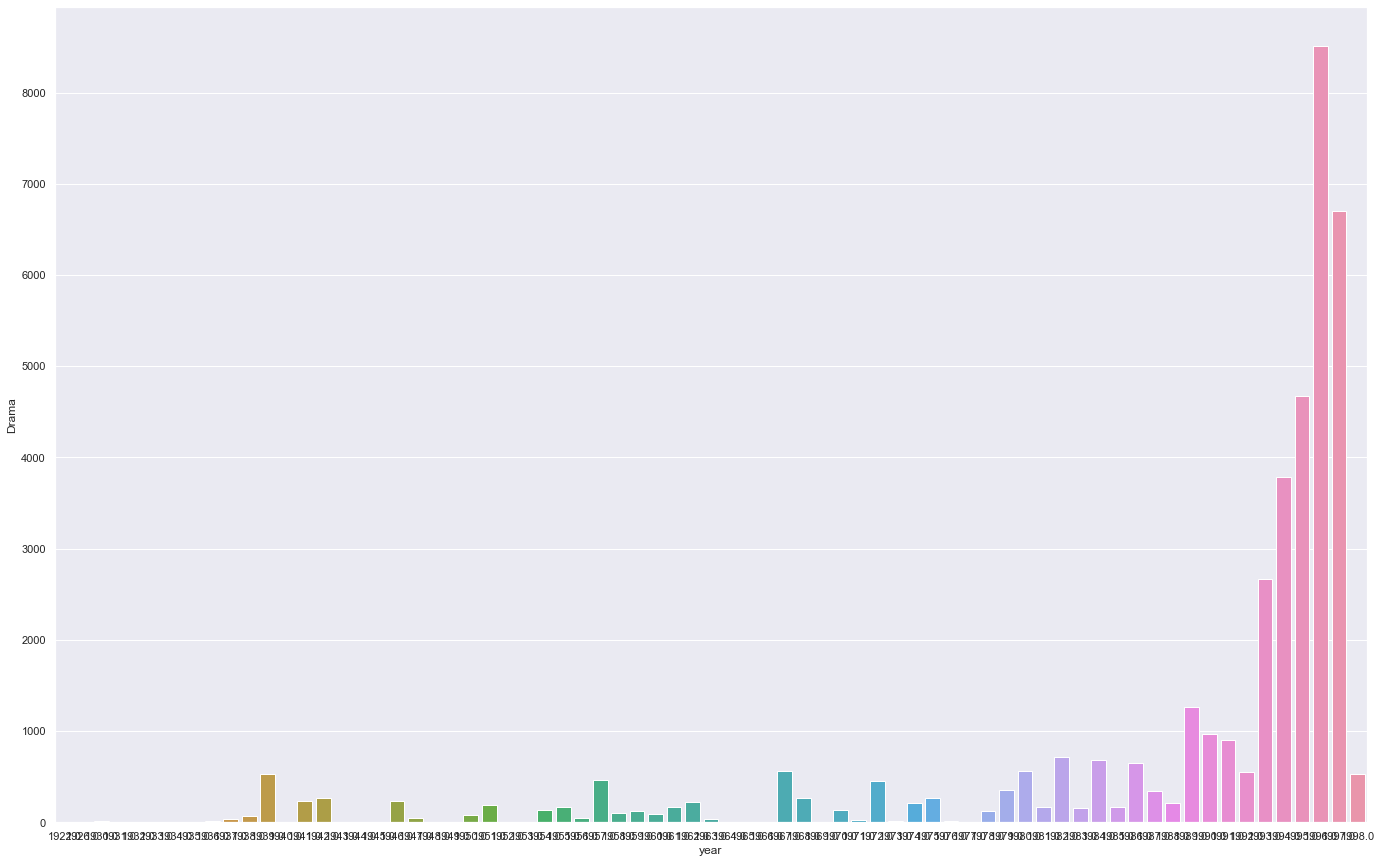

<Figure size 432x288 with 0 Axes>

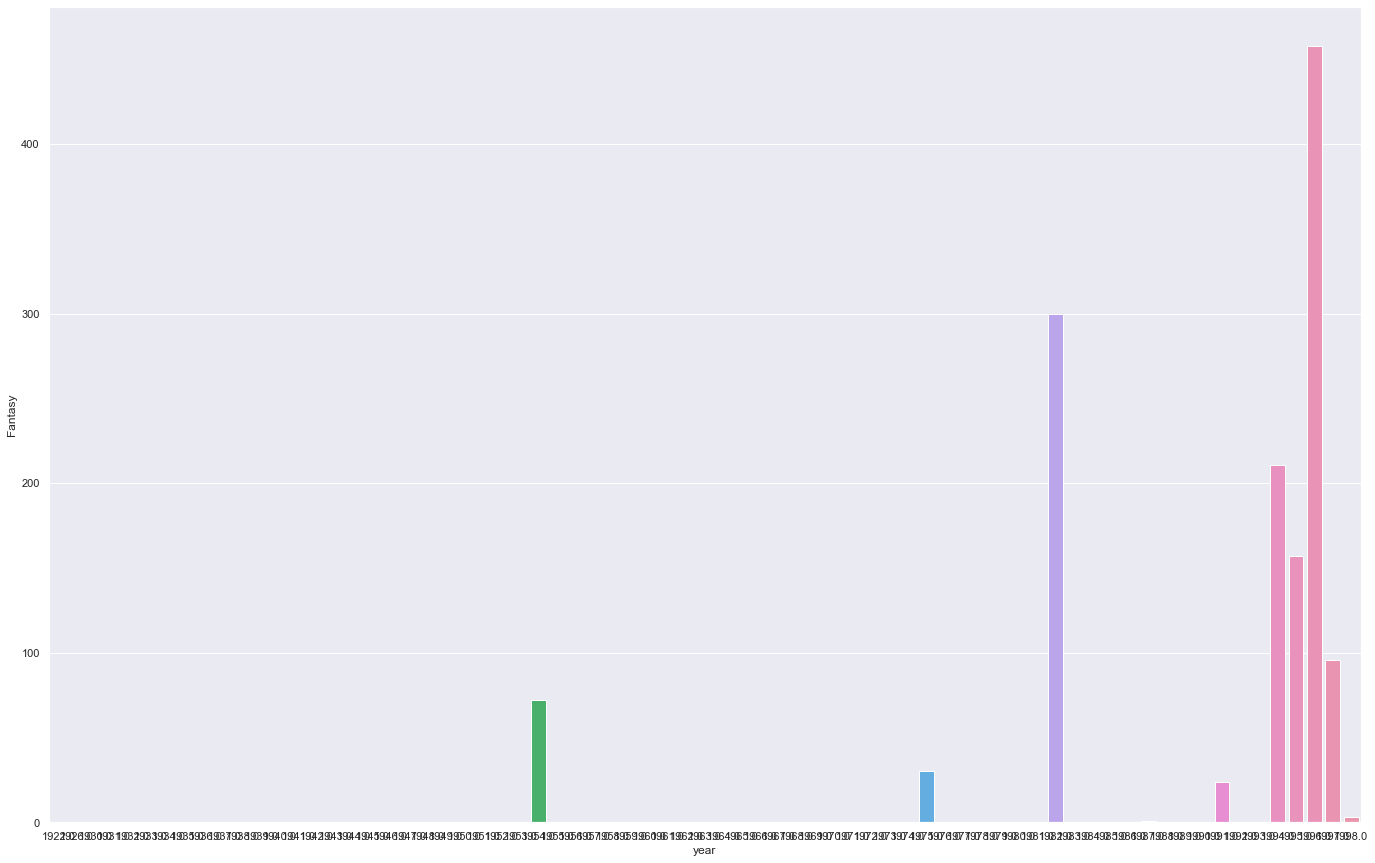

<Figure size 432x288 with 0 Axes>

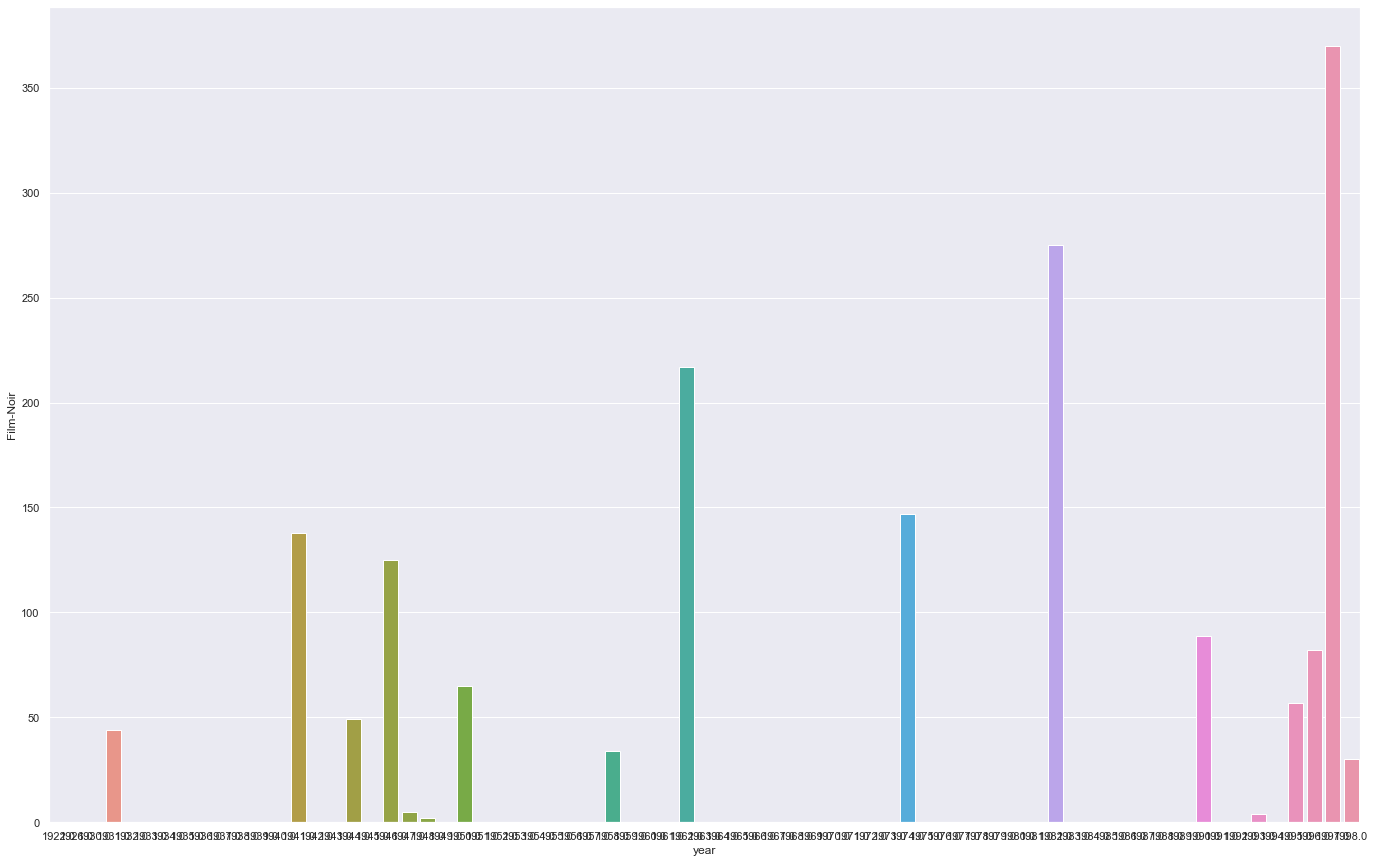

<Figure size 432x288 with 0 Axes>

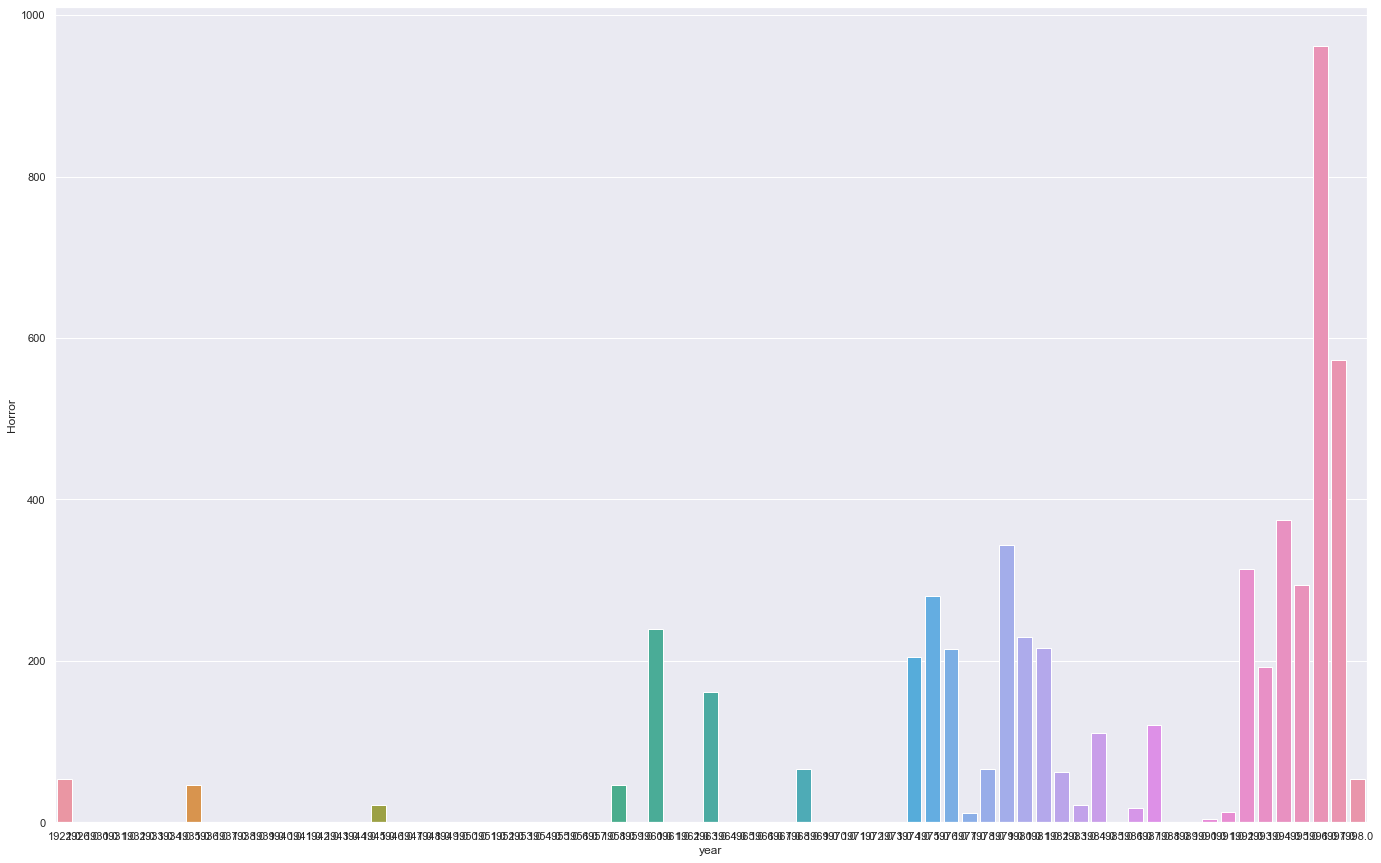

<Figure size 432x288 with 0 Axes>

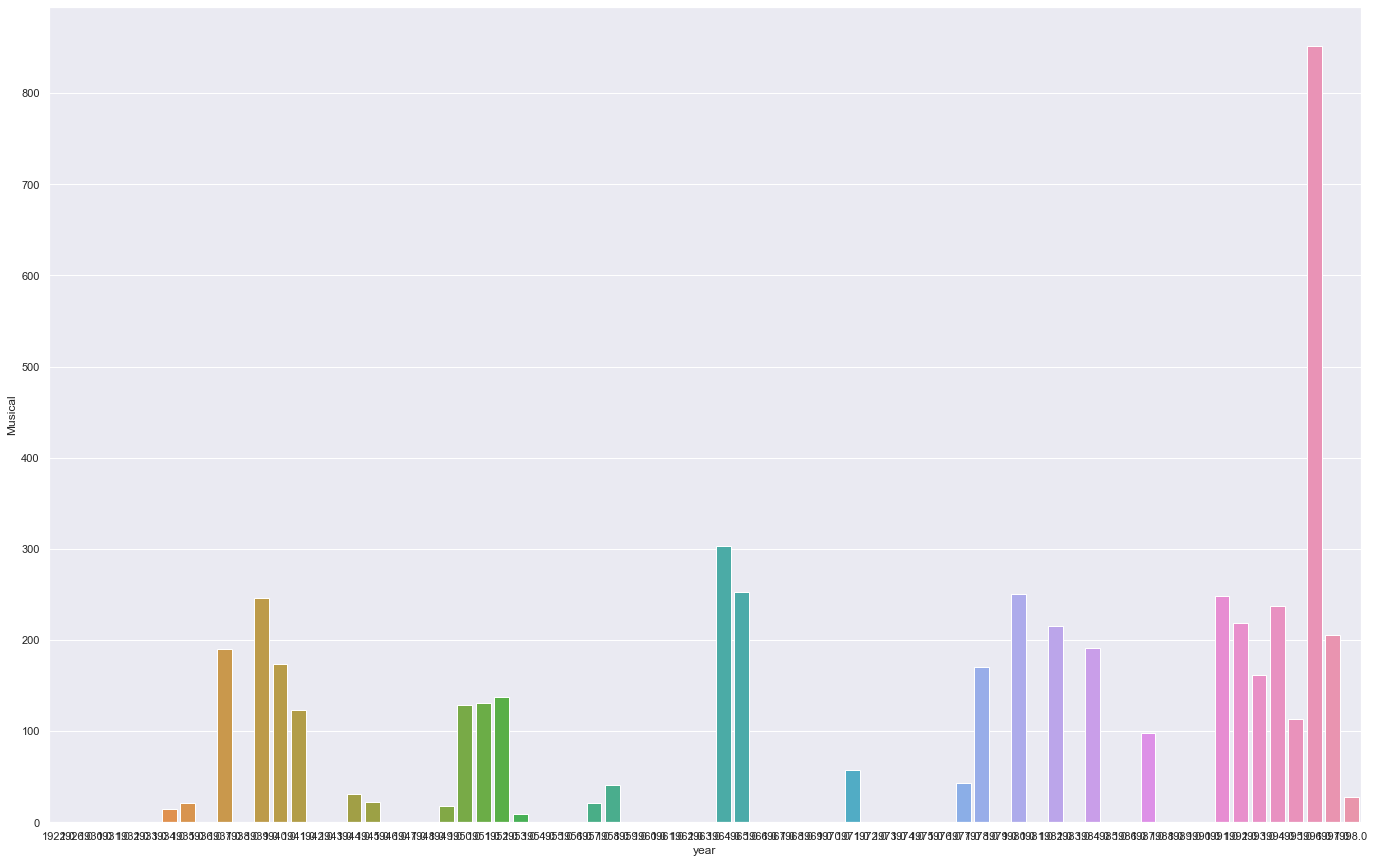

<Figure size 432x288 with 0 Axes>

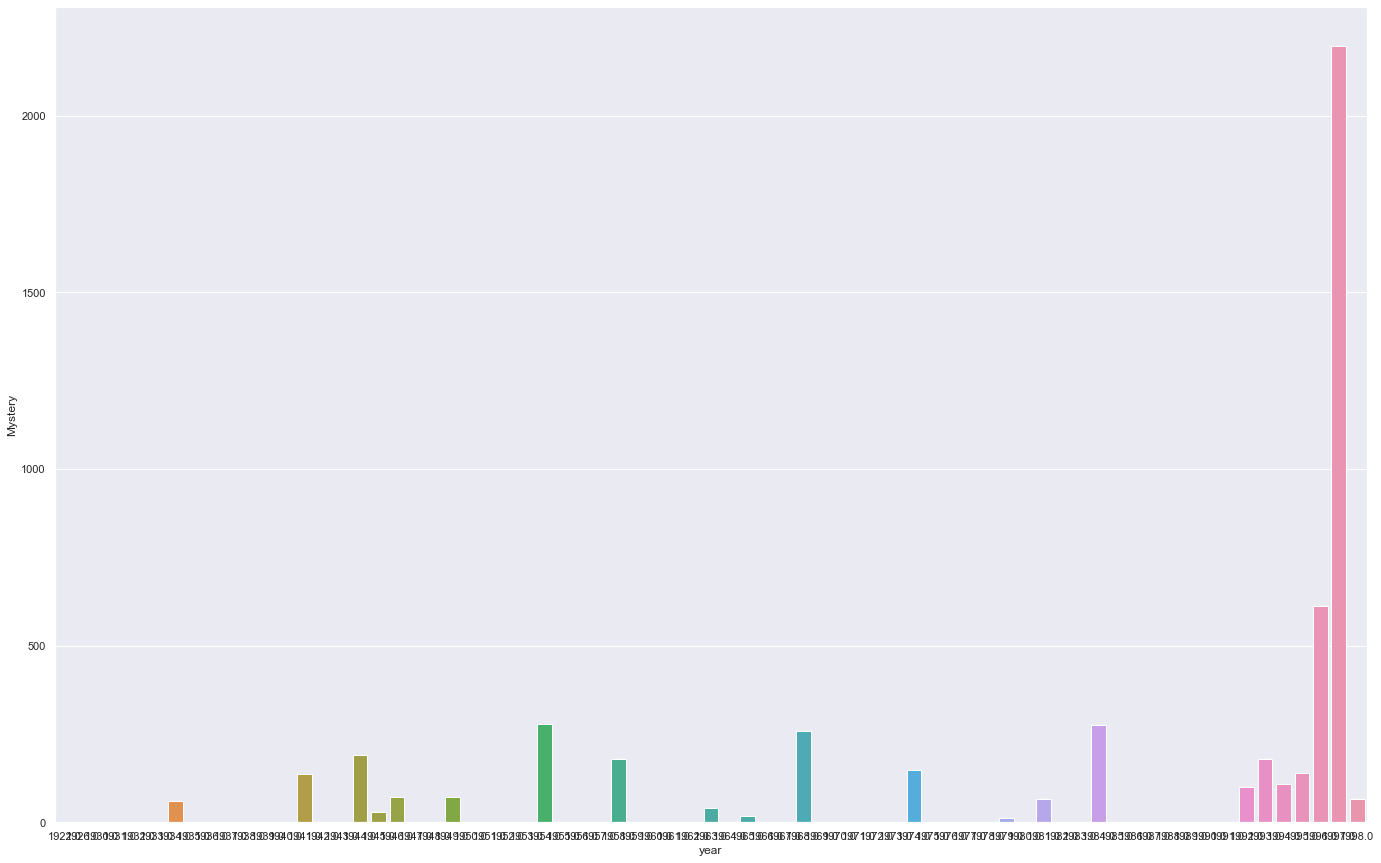

<Figure size 432x288 with 0 Axes>

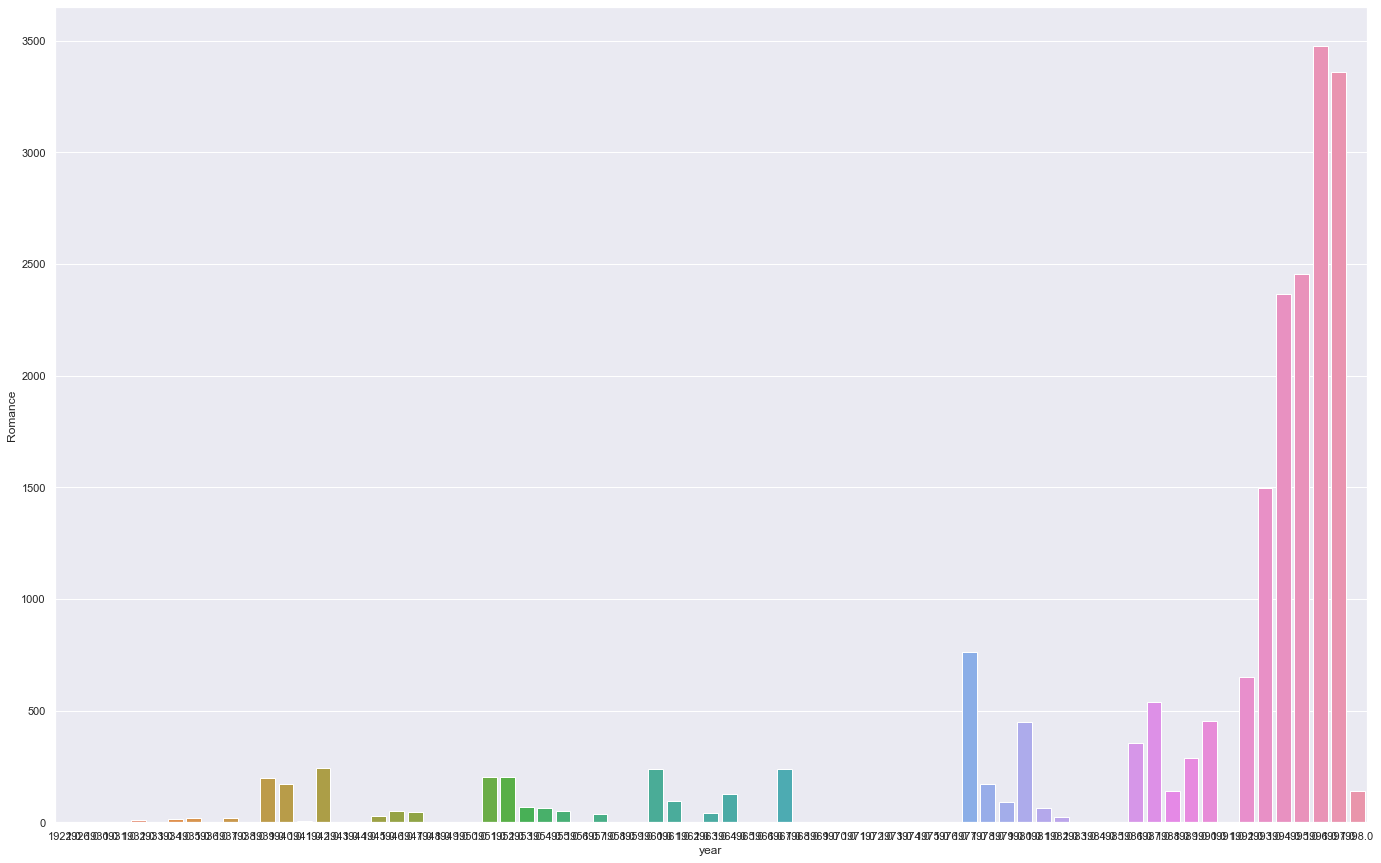

<Figure size 432x288 with 0 Axes>

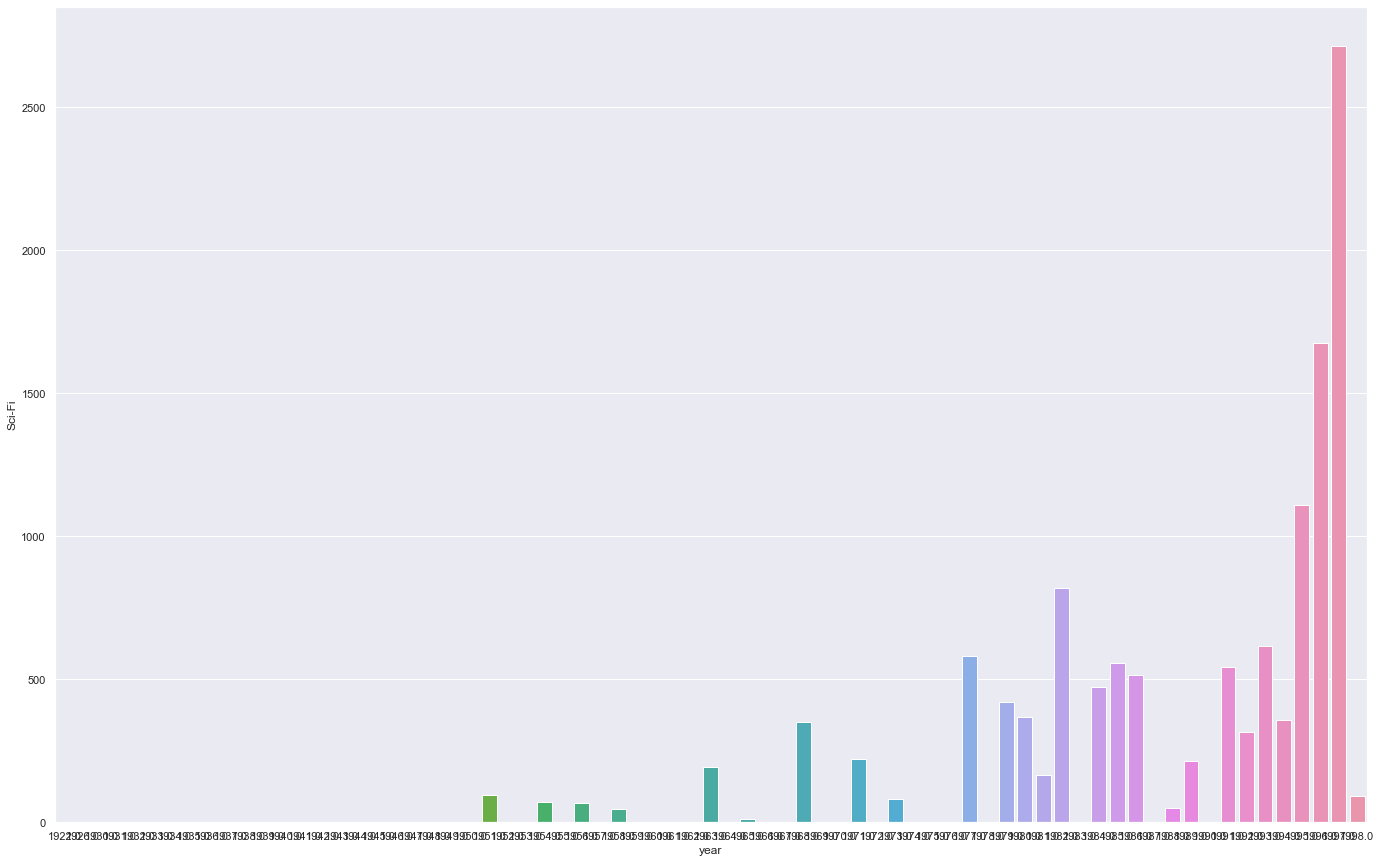

<Figure size 432x288 with 0 Axes>

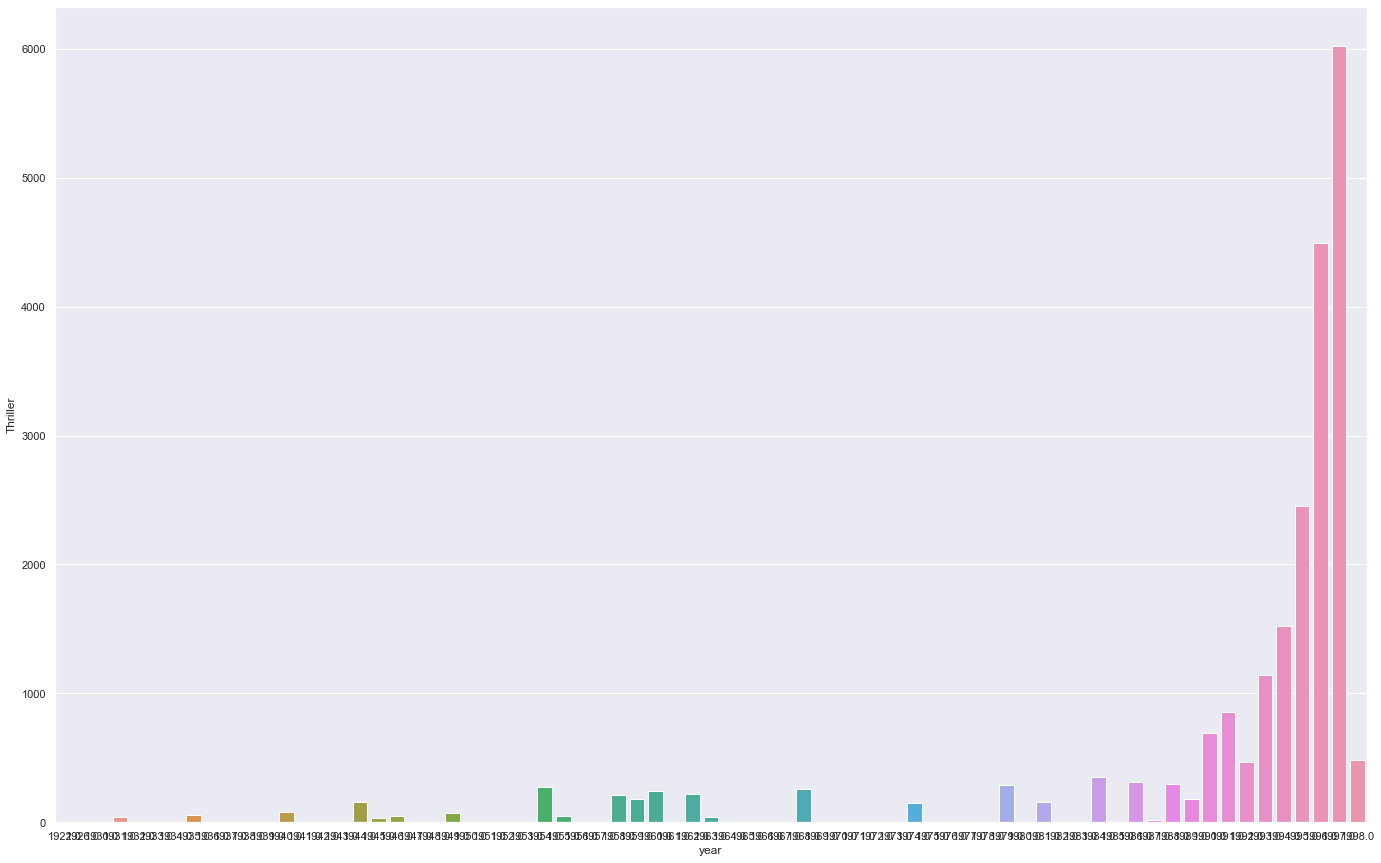

<Figure size 432x288 with 0 Axes>

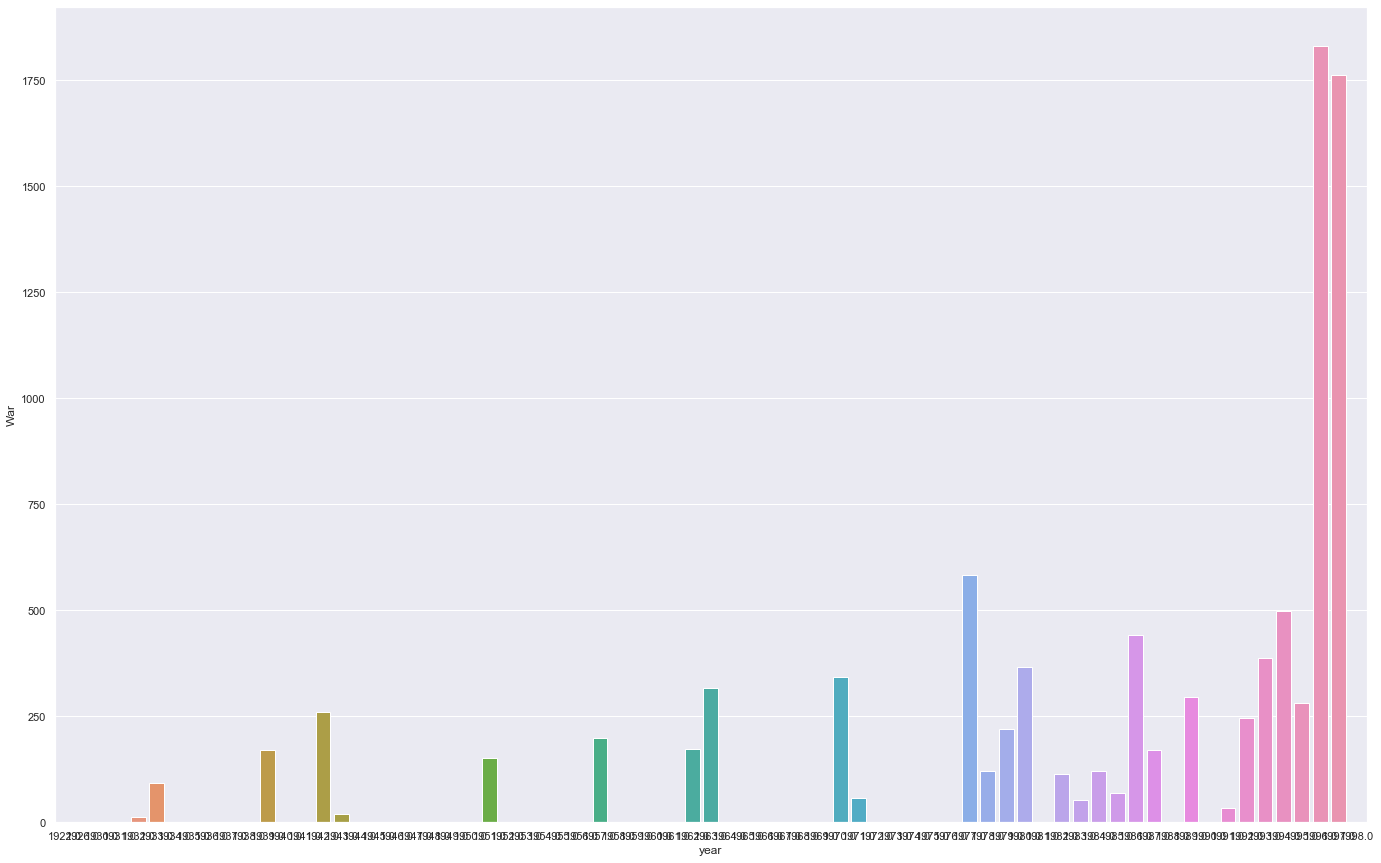

<Figure size 432x288 with 0 Axes>

In [224]:
genre_listAll = All_Data.columns[7:24]
print(genre_listAll)
for i in np.arange(7,24):
    #print(All_Data.columns[i])
    groupedyeari=All_Data.groupby(['year'])[All_Data.columns[i]].sum().reset_index()
    #print(groupedyeari)
    fig, ax = plt.subplots()
    fig.set_size_inches(23.5,15)
    sns.barplot(groupedyeari['year'],groupedyeari[All_Data.columns[i]],ax=ax)
    plt.xlabel('year')
    plt.ylabel(All_Data.columns[i])
    m=0
    n=0
    plt.subplots(m,n)
    m=+0
    n=+0
#plt.title('Count plot of the Action releases through years')

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [264]:
#sns.countplot(All_Data['movie title'])
#print(All_Data['rating'].sum()>=100)
#print('')
#print(All_Data[All_Data['rating']>=100.0])

In [265]:
#your answer here
print(All_Data['movie title'].nunique())

1657


In [266]:
groupedmovieT=All_Data.groupby(['movie title'])['rating'].sum().reset_index()
print(groupedmovieT)
print('')
#print(groupedmovieT[groupedmovieT['rating']>=100.0])
groupedmovieT100 = groupedmovieT[groupedmovieT['rating']>=100.0]
print(groupedmovieT100)
print('')
print(groupedmovieT100['rating'].sort_values(ascending=False))
sorted_top=groupedmovieT100.sort_values(by=['rating'],ascending=False)
print('')
###The top 25 movies###
print(sorted_top.head(25))

                          movie title  rating
0                 'Til There Was You       21
1                              1-900       13
2                     101 Dalmatians      317
3                       12 Angry Men      543
4                                187      124
...                               ...     ...
1652                      Young Guns      324
1653                   Young Guns II      122
1654  Young Poisoner's Handbook, The      137
1655                Zeus and Roxanne       13
1656     Á köldum klaka (Cold Fever)        3

[1657 rows x 2 columns]

                          movie title  rating
2                     101 Dalmatians      317
3                       12 Angry Men      543
4                                187      124
5               2 Days in the Valley      300
6       20,000 Leagues Under the Sea      252
...                               ...     ...
1647                      Wyatt Earp      155
1651              Young Frankenstein      789
1652    

In [267]:
#sns.distplot(All_Data['Action'], kde=False, rug=True, hue=All_Data['gender']);

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [284]:
groupedgender_Drama=All_Data.groupby(['gender'])['Drama'].sum().reset_index()
print(groupedgender_Drama)
#print(groupedgender_Drama['Drama'][0])
if groupedgender_Drama['Drama'][0]< groupedgender_Drama['Drama'][1]:
   print('Men watch more drama than women')
else:
   print('Men watch less drama than women')
        

  gender    Drama
0      F  11008.0
1      M  28887.0
Men watch more drama than women


In [292]:
groupedgender_Sci_Fi=All_Data.groupby(['gender'])['Sci-Fi'].sum().reset_index()
print(groupedgender_Sci_Fi)
if groupedgender_Sci_Fi['Sci-Fi'][0]>groupedgender_Sci_Fi['Sci-Fi'][1]:
    print('women watch more Sci_Fi than men')
else:
    print('women watch less Sci_Fi than men')

  gender   Sci-Fi
0      F   2629.0
1      M  10101.0
women watch less Sci_Fi than men


In [293]:
groupedgender_Romance=All_Data.groupby(['gender'])['Romance'].sum().reset_index()
print(groupedgender_Romance)
if groupedgender_Romance['Romance'][0]<groupedgender_Romance['Romance'][1]:
    print('women watch less Romance than men')
else:
    print('women watch more Romance than men')

  gender  Romance
0      F   5858.0
1      M  13603.0
women watch less Romance than men


#### Conclusion:



In [ ]:
#Men watch more drama than women
#women watch less Sci_Fi than men
#women watch less Romance than men